# MNIST prediction
## Mirko Lantieri


In this notebook, will be described the approach used to build a Convolutional Neural Network for MNIST digits of input shape 28x28x1 and number of classes equal to 10. The main objective within this notebook is to reach the highest possible accuracy on the test set (valdation), with the maximum hard constraint of 7000 learnable parameters. Below the available code, including the description:

## Initial setup and library importing <br>
Below we import the library responsable for the plotting of our data and the creation of the CNN to be defined later on 

In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import rc
from tensorflow import keras

# permits the inline plotting
%matplotlib inline 
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 60
BATCH_SIZE = 128

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
# Model parameters loading
num_classes = 10
input_shape = (28,28,1)

# Splitting the dataset into train and test validation set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Preprocessing <br>
Below we start the preprocessing by making some rescaling to the train and test into 0-1 range and also by reshaping it to 28,28,1

In [3]:
# Preprocessing of the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Turn images into shape (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(f"x_train shape generated: {X_train.shape}")
print(f"x_train samples generated: {X_train.shape[0]}")
print(f"x_test samples generated: {X_test.shape[0]}")

x_train shape generated: (60000, 28, 28, 1)
x_train samples generated: 60000
x_test samples generated: 10000


In [4]:
# Convertion of our matrices to binary class
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Definition of the CNN 
Below we define some models of CNN in order to make the prediction and obtain the highest accuracy a model can reach

### Model 1 <br>
This CNN model has deep layers containing initially the input shape we declared initially, by giving different filter wights (like 8 or 16), to move on with a kernel size of 3x3. Then we apply a maxpooling method with a pool size of 2x2, following another CNN layer and maxpooling of same kernel size, but with sigmoidal activation for the second convolutional layer. The chosen dropout is 0.3. The number of epochs used for the training is 20. Optimizer: Adam. Total parameters: 5,258

In [5]:
# Definition of the first model
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="sigmoid"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                4

In [6]:
epochs = 20

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 8s 21ms/step - loss: 1.3489 - accuracy: 0.5631 - val_loss: 0.3960 - val_accuracy: 0.9018
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3862 - accuracy: 0.8894 - val_loss: 0.2372 - val_accuracy: 0.9381
Epoch 3/20
375/375 [==============================] - 7s 20ms/step - loss: 0.2722 - accuracy: 0.9219 - val_loss: 0.1799 - val_accuracy: 0.9534
Epoch 4/20
375/375 [==============================] - 8s 20ms/step - loss: 0.2157 - accuracy: 0.9377 - val_loss: 0.1476 - val_accuracy: 0.9610
Epoch 5/20
375/375 [==============================] - 8s 21ms/step - loss: 0.1837 - accuracy: 0.9467 - val_loss: 0.1274 - val_accuracy: 0.9654
Epoch 6/20
375/375 [==============================] - 9s 23ms/step - loss: 0.1631 - accuracy: 0.9525 - val_loss: 0.1118 - val_accuracy: 0.9689
Epoch 7/20
375/375 [==============================] - 8s 20ms/step - loss: 0.1463 - accuracy: 0.9561 - val_loss: 0.1005 - val_accuracy: 0.9717

### Model 2 <br> 
The second model is almost identical to the previous one, but instead we gave a size of 16 to each Conv2D layer, combined with a "selu" and "relu" activation parameters. The dropout used this time is 0.5 which means half of the neurons of the hidden layers will be dropped in order to make regularization of this kind. This model has 6490 parameters in total. The batch size and number of the epochs are the same. Optimizer: Adam

In [7]:
# Definition of the second model
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="selu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),

        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [8]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1 = model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 10s 26ms/step - loss: 0.6587 - accuracy: 0.7905 - val_loss: 0.1671 - val_accuracy: 0.9563
Epoch 2/20
375/375 [==============================] - 10s 26ms/step - loss: 0.2439 - accuracy: 0.9261 - val_loss: 0.1145 - val_accuracy: 0.9705
Epoch 3/20
375/375 [==============================] - 10s 28ms/step - loss: 0.1899 - accuracy: 0.9420 - val_loss: 0.0944 - val_accuracy: 0.9749
Epoch 4/20
375/375 [==============================] - 12s 31ms/step - loss: 0.1591 - accuracy: 0.9523 - val_loss: 0.0832 - val_accuracy: 0.9762
Epoch 5/20
375/375 [==============================] - 13s 34ms/step - loss: 0.1468 - accuracy: 0.9550 - val_loss: 0.0758 - val_accuracy: 0.9793
Epoch 6/20
375/375 [==============================] - 13s 33ms/step - loss: 0.1383 - accuracy: 0.9579 - val_loss: 0.0707 - val_accuracy: 0.9802
Epoch 7/20
375/375 [==============================] - 12s 33ms/step - loss: 0.1302 - accuracy: 0.9597 - val_loss: 0.0694 - val_accuracy:

## Evaluation of the model <br>
In this section we introduce the evaluation metrics of our models defined above. We are interested into the accuracy and loss function

In [9]:
## Evaluation on the validation : First model

score1 = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])
print(history.history.keys())

Test loss: 0.05251713842153549
Test accuracy: 0.9835000038146973
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
## Evaluation on the validation : Second model

score2 = model2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])
print(history1.history.keys())

Test loss: 0.04271027073264122
Test accuracy: 0.9861000180244446
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Below we plot the training and validation history of our models, including the accuracy and the loss

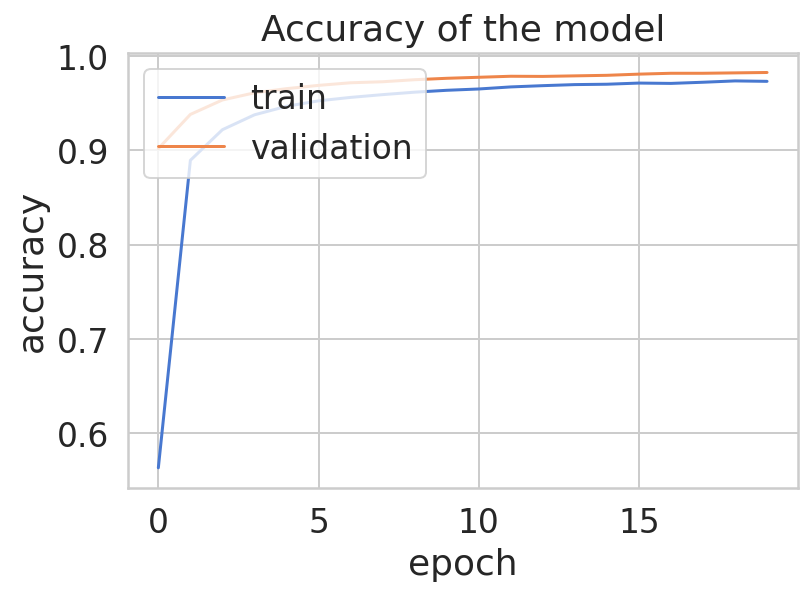

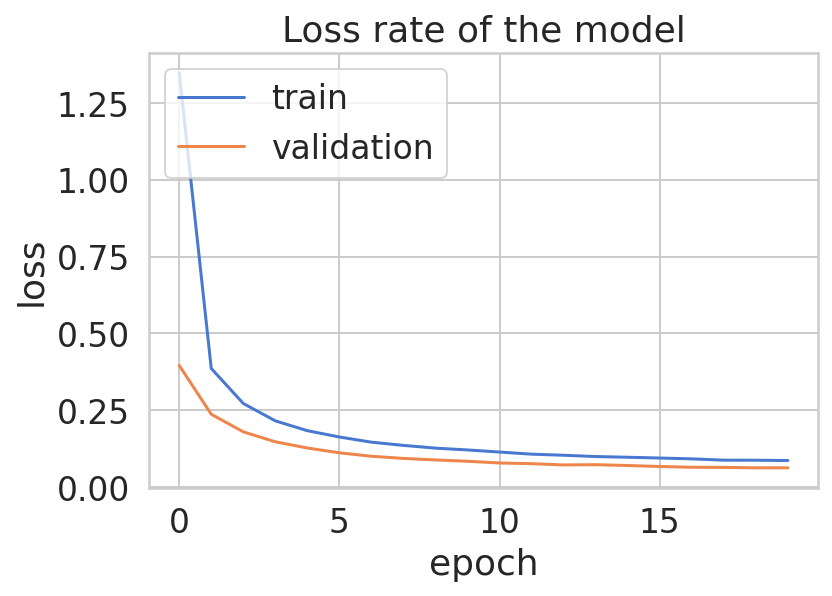

In [11]:
# Summarize history for accuracy: first model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss rate of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

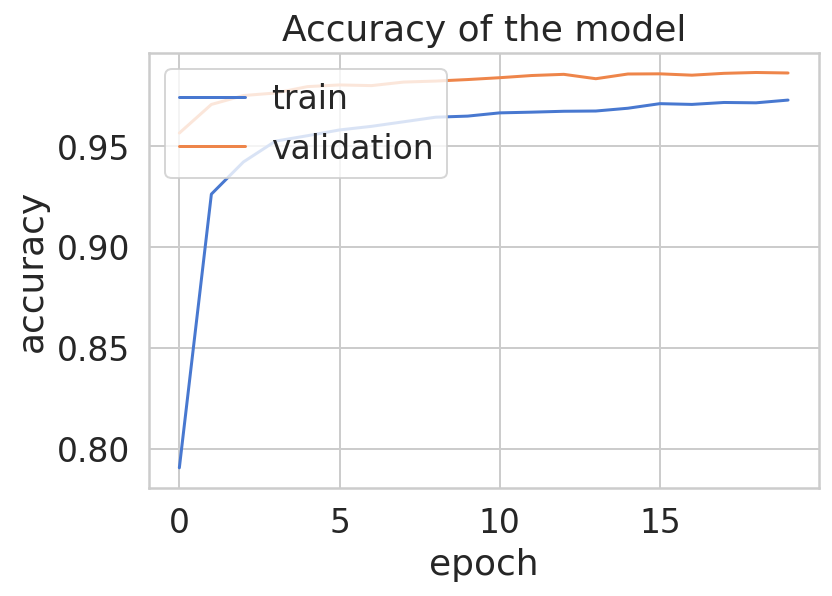

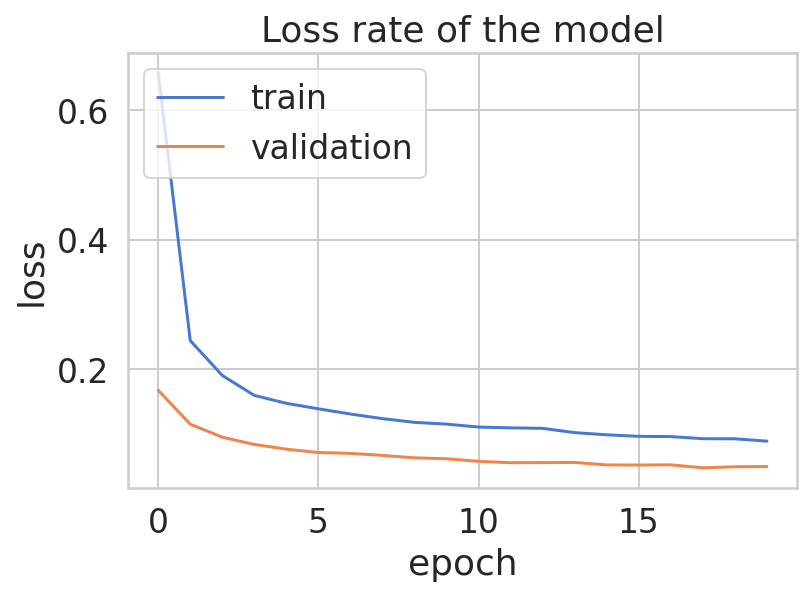

In [12]:
# Summarize history for accuracy: second model
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss rate of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()